<a href="https://colab.research.google.com/github/joseff-regmi/vgsales/blob/main/video_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 To look at:<br>
1) Which is the best Platform based on Golbal_Sales?<br>
2) Which genre is most populer base on Global_Sales?<br>
3) Which type of games are popular in different part of world? <br>
4) what is the condition of data? does it need some repair or fine?<br>
5) Which is the top sold game in each year ?<br>
6) NES vs GB each year ?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from typing import Set


df = pd.read_csv('vgsales.csv')



df.head(10)

# print(df[df['Platform']=='NES'].value_counts())

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


0.53744065550074


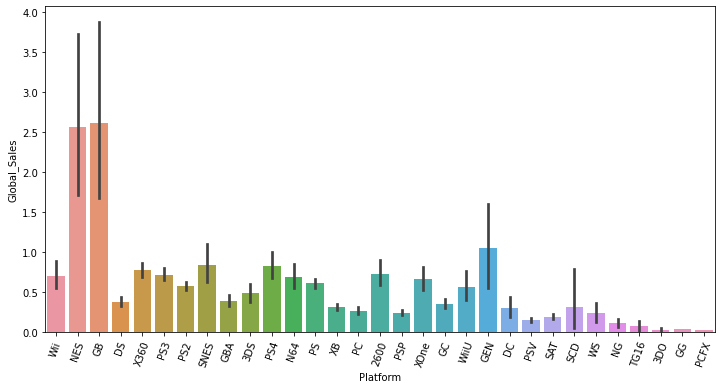

In [ ]:
plat_gol = df.iloc[:,[2,10]]
plat_gol.sort_values("Global_Sales")

print(plat_gol['Global_Sales'].mean())

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x=plat_gol['Platform'], y=plat_gol['Global_Sales'], ax=ax )
plt.xticks(rotation=70)

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.show()

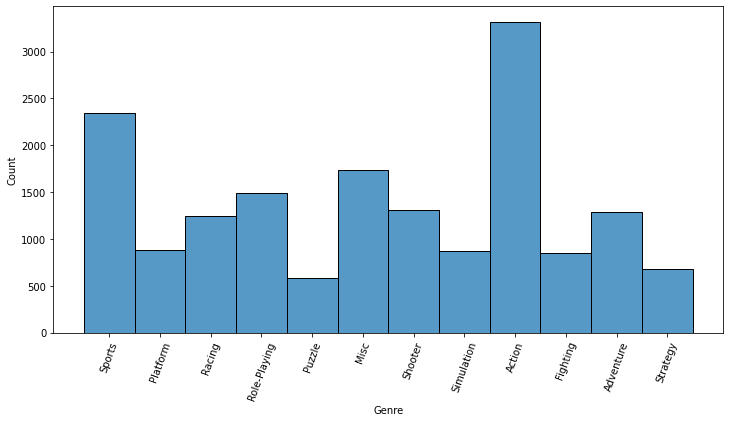

In [ ]:
genre = df.iloc[:,[4]]
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=genre['Genre'], ax=ax)
plt.xticks(rotation=70)
plt.show()

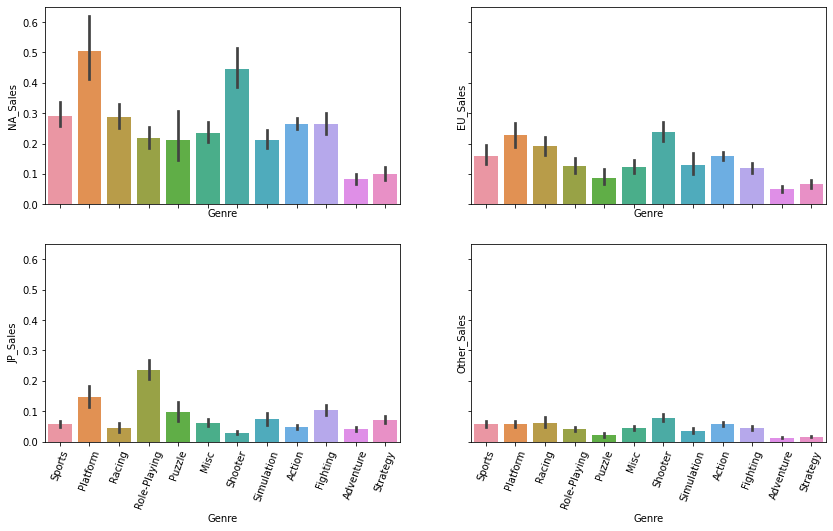

In [ ]:
popular_games = df.iloc[:,[4,6,7,8,9]]

fig, axes=plt.subplots(2, 2, figsize=(14, 8), sharey=True, squeeze=True, sharex=True )



def show_charts():
    sns.barplot(ax=axes[0, 0], x=df['Genre'], y=df['NA_Sales']),
    sns.barplot(ax=axes[0, 1], x=df['Genre'], y=df['EU_Sales']),
    sns.barplot(ax=axes[1, 0], x=df['Genre'], y=df['JP_Sales']),
    sns.barplot(ax=axes[1, 1], x=df['Genre'], y=df['Other_Sales'])

for ax in axes.flat:
    for tick in ax.get_xticklabels():
      tick.set_rotation(70)


show_charts()
plt.show()


Data cleaning !!

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

As we can see Year column has 271 missing values, and Publisher has 58. We can sove this problem with dropna() method but it will delete the entire row of the df so, it is not recomanded.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


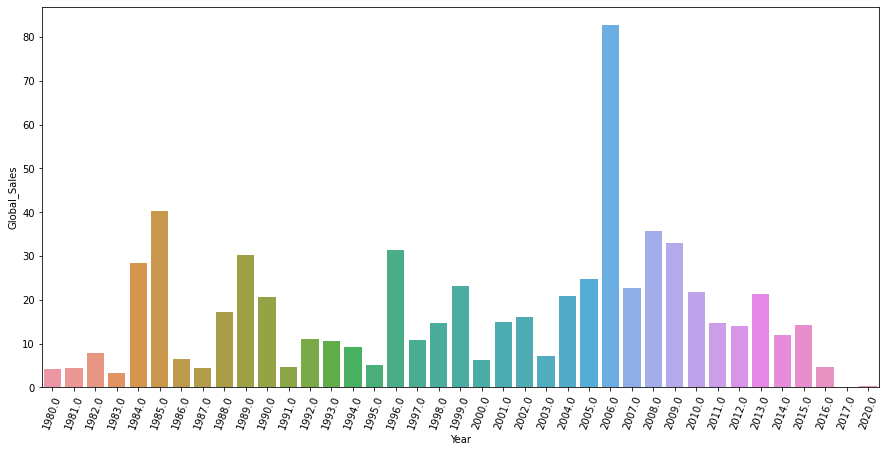

In [ ]:
df1 = df.iloc[:,[1, 3, 10]]
# ________Less complex way________

df1 = df1.groupby('Year')['Global_Sales', 'Name'].max()
df1 = df1.sort_values(by='Year', ascending=False)
df1.reset_index(drop=False, inplace=True)
# print(df1.head(40))


# _________ way___________

# years = df1['Year'].unique()
# data = []
# year = []
# for i in years:
#     data.append(df1[df1['Year']==i]['Global_Sales'].max())
#     year.append(i)
# df2 = pd.DataFrame(list(zip(year, data)), columns=['Year', 'Global_Sales'])
# df1 = df2.sort_values(by='Year')
# df1.dropna(inplace=True)


fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=df1['Year'], y=df1['Global_Sales'], ax=ax)
plt.xticks(rotation=70)
plt.show()


In [ ]:
df['Name']
df.iloc[0]

Rank                     1
Name            Wii Sports
Platform               Wii
Year                  2006
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Name: 0, dtype: object

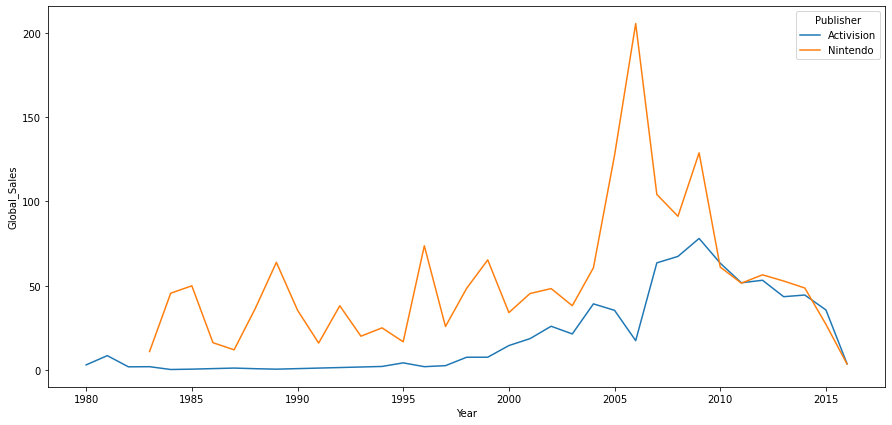

In [ ]:
# <<<<<<<< MY CODE >>>>>>>>>>>>>>>>>>>>

# def compare_two(by, first, second):
#     """
#       by: Genre or Platform or Publisher
#       first: first item from 'by'
#       second: second item from 'by'
#     """
#     try:
#       f_plat = df[df[by] == first]
#       s_plat = df[df[by] == second]

#       f_plat = f_plat.sort_values('Year', ascending=True)
#       f_grouped = f_plat.groupby('Year')['Global_Sales'].sum()
#       f_frame = f_grouped.to_frame(str(first) + '_Global_Sales')

#       s_plat = s_plat.sort_values('Year', ascending=True)
#       s_grouped = s_plat.groupby('Year')['Global_Sales'].sum()
#       s_frame = s_grouped.to_frame(str(second) + '_Global_Sales')

#       con_df = pd.concat([f_frame, s_frame], axis=1)
#       con_df.reset_index(drop = False , inplace = True)
#       con_df = con_df.fillna(0)
#       con_df.sort_values(by='Year')

#       fig_dims = (15, 7)
#       ax = con_df.plot(x='Year', y= str(first) + '_Global_Sales', legend=False, figsize=fig_dims, kind='line')
#       con_df.plot(x="Year", y= str(second) + '_Global_Sales', ax=ax, legend=False, color="r", kind='line')
#       ax.figure.legend()
#       plt.show()

#     except:
#       print("can't execute check the function call")


# compare_two('Publisher', 'Activision', 'Nintendo')

#<<<<<<<<<<<<<<< Optimized above code by Renderian from StackExchange >>>>>>>>>>>>>>>>>>>>>>

def compare_sales(df: DataFrame, by: str, to_compare: Set[str]) -> None:
    df = df[
        df[by].isin(to_compare)
    ].groupby(
        ['Year', by], as_index=False,
    )['Global_Sales'].sum()
    fig_dims = (15, 7)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.lineplot(data=df, x='Year', y='Global_Sales', ax=ax, hue=by)
    plt.show()

compare_sales(df, 'Publisher', {'Nintendo', 'Activision'})
